![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


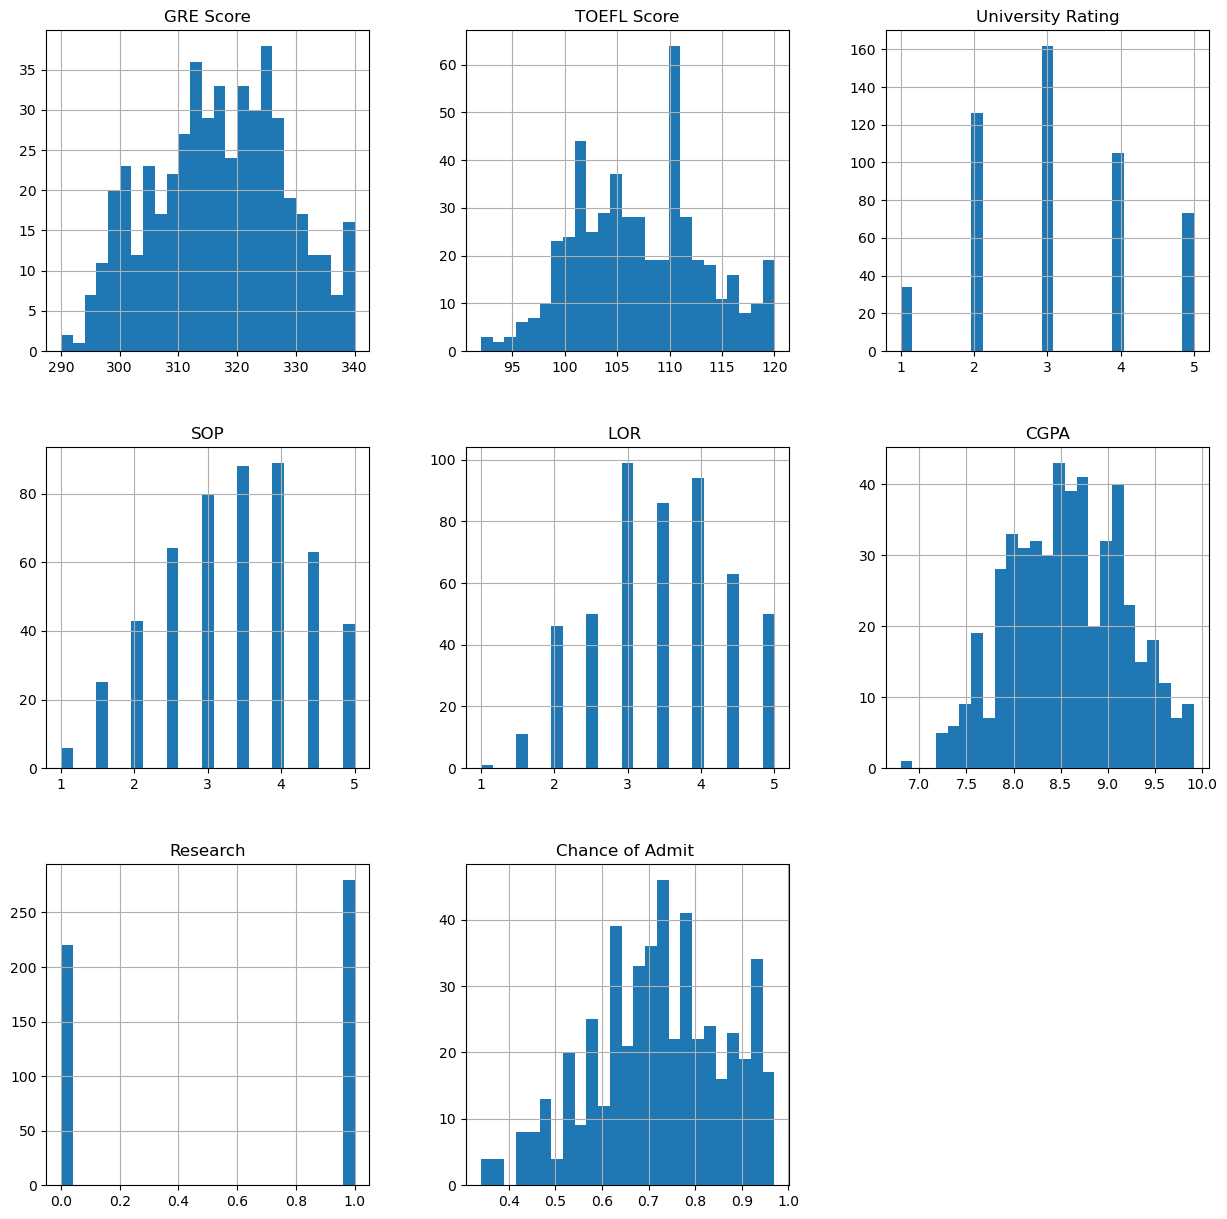

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]
Y= pd.DataFrame(Y)

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [7]:
# Celda 1

epocas= 100
# Normalización de variables predictoras (X) con la función StandardScaler

from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

In [8]:
# Definición de dimensiones de salida, variables de interés
output_var = yTrain.shape[1]
print(output_var, ' output variables')

1  output variables


In [9]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = xTrain.shape[1]
print(dims, 'input variables')

7 input variables


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')



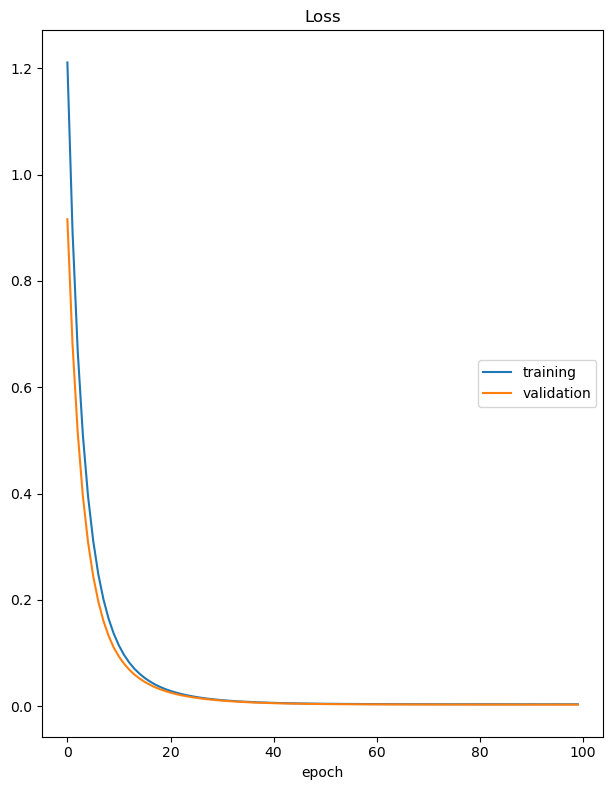

Loss
	training         	 (min:    0.004, max:    1.211, cur:    0.004)
	validation       	 (min:    0.003, max:    0.916, cur:    0.003)
11/11 [==============================] - 0s 29ms/step - loss: 0.0038 - val_loss: 0.0031


In [12]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=epocas, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [13]:
# Evaluación del modelo con métricas MAE y MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

yPred_1 = model.predict(xTest)
MAE_1 = mean_absolute_error(yTest, yPred_1)
MSE_1 = mean_squared_error(yTest, yPred_1)
print('MAE:', MAE_1)
print('MSE:', MSE_1 )

5/5 [==============================] - 0s 2ms/step
MAE: 0.04085317730108897
MSE: 0.0031441216176371326


### Análisis punto 1

Para la creación de la red neuronal con una capa se usó la función de perdida de error cuadrático medio (mean_squared_error), debido a que es una buena elección para modelos de regresión sin complejidad, ya que se quiere predecir un valor numérico continúo representado por la probabilidad de admisión a la universidad.   
Para el optimizador se escogió el descenso de gradiente estocástico (SGD), este actualiza los pesos de la red en función del gradiente de la función de perdida en cada iteración.  
En cuanto al número de épocas se ha utilizado un valor de 100, es decir que el modelo se entrena durante 100 iteraciones completas de los datos de entrenamiento, en la gráfica se puede apreciar que aproximadamente en la época 30 los valores de perdida en entrenamiento y validación bajan a un valor casi constante, por lo tanto, el modelo de red neuronal se estabiliza.  
Para este modelo las métricas de desempeño fueron: MAE = 0.0408 y MSE = 0.0031 que son valores mínimos, indicando que el modelo tiene un buen rendimiento.


## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [14]:
# Celda 2


K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

In [16]:
# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size=0.15, random_state=42)

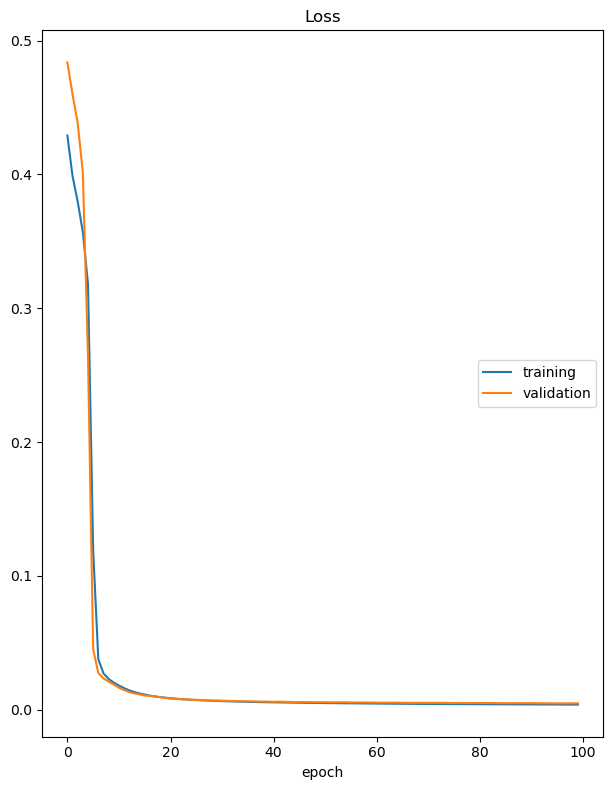

Loss
	training         	 (min:    0.004, max:    0.429, cur:    0.004)
	validation       	 (min:    0.005, max:    0.484, cur:    0.005)
10/10 [==============================] - 0s 27ms/step - loss: 0.0038 - val_loss: 0.0047


In [17]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain,
          validation_data = (xVal, yVal),
          epochs=epocas, 
          callbacks=[PlotLossesKeras()])

In [18]:
yPred_2 = model.predict(xVal)
MAE_2 = mean_absolute_error(yVal, yPred_2)
MSE_2 = mean_squared_error(yVal, yPred_2)
print('MAE:', MAE_2)
print('MSE:', MSE_2 )

2/2 [==============================] - 0s 3ms/step
MAE: 0.05181485070372529
MSE: 0.004691756432422871


### Análisis punto 2

En el modelo de red neuronal con dos capas, se utilizó la función de perdida MSE (mean_squared_error), debido a su efectividad en problemas de regresión que se optimiza con una técnica de gradiente descendente.  
Para el optimizador se seleccionó SGD debido a su simplicidad y eficacia en modelos de redes neuronales no complejas y puede proporcionar resultados considerables en un tiempo adecuado para el modelo usado.  
Se escogieron 100 épocas y se pudo evidenciar según la gráfica que a partir de 20 iteraciones el modelo se estabiliza y no mejora más.  
Se seleccionaron 256 neuronas para la capa densa de la red neuronal proporcionando una mayor capacidad de aprendizaje del modelo obteniendo resultados considerables.  
Para este modelo las métricas de desempeño fueron: MAE = 0.0518 y MSE = 0.0046 que son valores mínimos, indicando que el modelo tiene un buen rendimiento.


## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [19]:
# Celda 3
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

# Impresión de la arquitectura de la red neuronal
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-traina

In [20]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento

from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

In [21]:
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

In [22]:
# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
xTrain, xVal2, yTrain, yVal2 = train_test_split(xTrain, yTrain, test_size=0.15, random_state=42)

Epoch 1/100
2/2 [==============================] - 1s 266ms/step - loss: 0.5350 - val_loss: 0.5088
Epoch 2/100
2/2 [==============================] - 0s 75ms/step - loss: 0.5305 - val_loss: 0.5067
Epoch 3/100
2/2 [==============================] - 0s 76ms/step - loss: 0.5267 - val_loss: 0.5023
Epoch 4/100
2/2 [==============================] - 0s 79ms/step - loss: 0.5184 - val_loss: 0.4902
Epoch 5/100
2/2 [==============================] - 0s 67ms/step - loss: 0.5054 - val_loss: 0.4657
Epoch 6/100
2/2 [==============================] - 0s 76ms/step - loss: 0.4832 - val_loss: 0.4290
Epoch 7/100
2/2 [==============================] - 0s 91ms/step - loss: 0.4477 - val_loss: 0.3624
Epoch 8/100
2/2 [==============================] - 0s 60ms/step - loss: 0.3827 - val_loss: 0.2820
Epoch 9/100
2/2 [==============================] - 0s 52ms/step - loss: 0.2892 - val_loss: 0.2104
Epoch 10/100
2/2 [==============================] - 0s 52ms/step - loss: 0.2207 - val_loss: 0.1592
Epoch 11/100
2/2 [

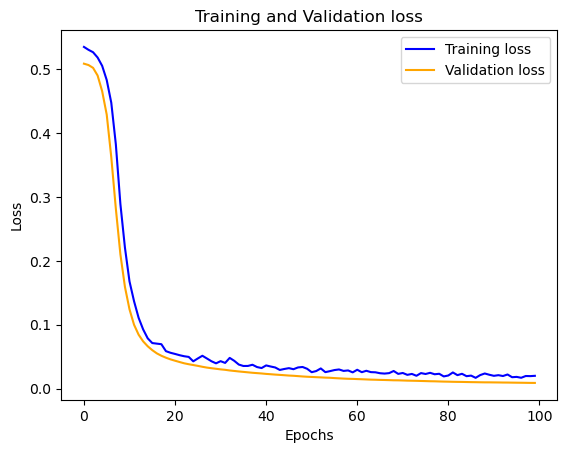

In [23]:
# Entrenamiento de la red neuronal con 50 épocas y early stopping
red = model.fit(xTrain, yTrain, 
          verbose=True, 
          epochs=epocas, 
          batch_size=128,
          validation_data=(xVal2,yVal2),
          callbacks=[best_model, early_stop])


# Obtención del historial del entrenamiento
loss_train = red.history['loss']
loss_val = red.history['val_loss']

# Graficación de la función de pérdida durante el entrenamiento y validación
plt.plot(loss_train, 'b', label='Training loss')
plt.plot(loss_val, 'orange', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
yPred_3 = model.predict(xVal2)
MAE_3 = mean_absolute_error(yVal2, yPred_3)
MSE_3 = mean_squared_error(yVal2, yPred_3)
print('MAE:', MAE_3)
print('MSE:', MSE_3 )

2/2 [==============================] - 0s 3ms/step
MAE: 0.07210884449217055
MSE: 0.008885775220201194


### Análisis punto 3

En este modelo de red neuronal multicapa se utilizaron 3 capas, la primera y segunda tienen 256 neuronas y se utilizó una función de activación Relu, la tercera capa tiene el número de neurona igual a las variables de salida con el uso de Relu. También se utilizaron dos capas de Dropout con un valor de 0.2 para reducir el sobreajuste.  
La función de perdida usada sigue siendo MSE (mean_squared_error) ya que el problema es de regresión. 


El optimizador usado es SGD que minimiza la función de perdida durante el entrenamiento de la red neuronal.  


Se usaron 100 épocas adicionando la función Earlystopping para detener el entrenamiento si la función de perdida no mejora después de dos épocas, se realizó para evitar sobreajuste.  
Las métricas de MAE = 0.0721 y MSE = 0.0088 muestran un buen rendimiento del modelo


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

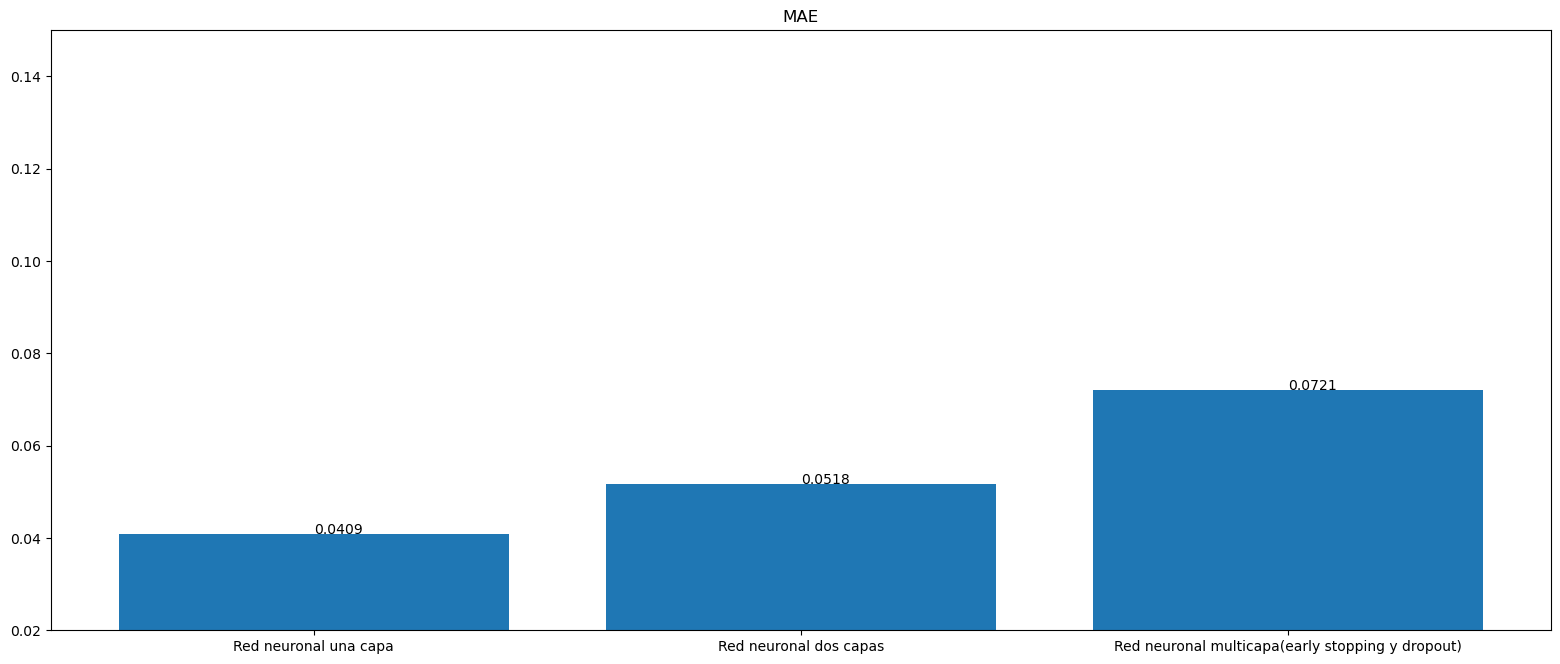

In [25]:
# Celda 4

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,6))
ax = fig.add_axes([0,0,1,1])

ax.set_title("MAE")
ejeX = ['Red neuronal una capa','Red neuronal dos capas','Red neuronal multicapa(early stopping y dropout)']
ejeY = [round(MAE_1,4), round(MAE_2,4), round(MAE_3,4) ]
ax.bar(ejeX,ejeY)
plt.ylim(0.02,0.15)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()


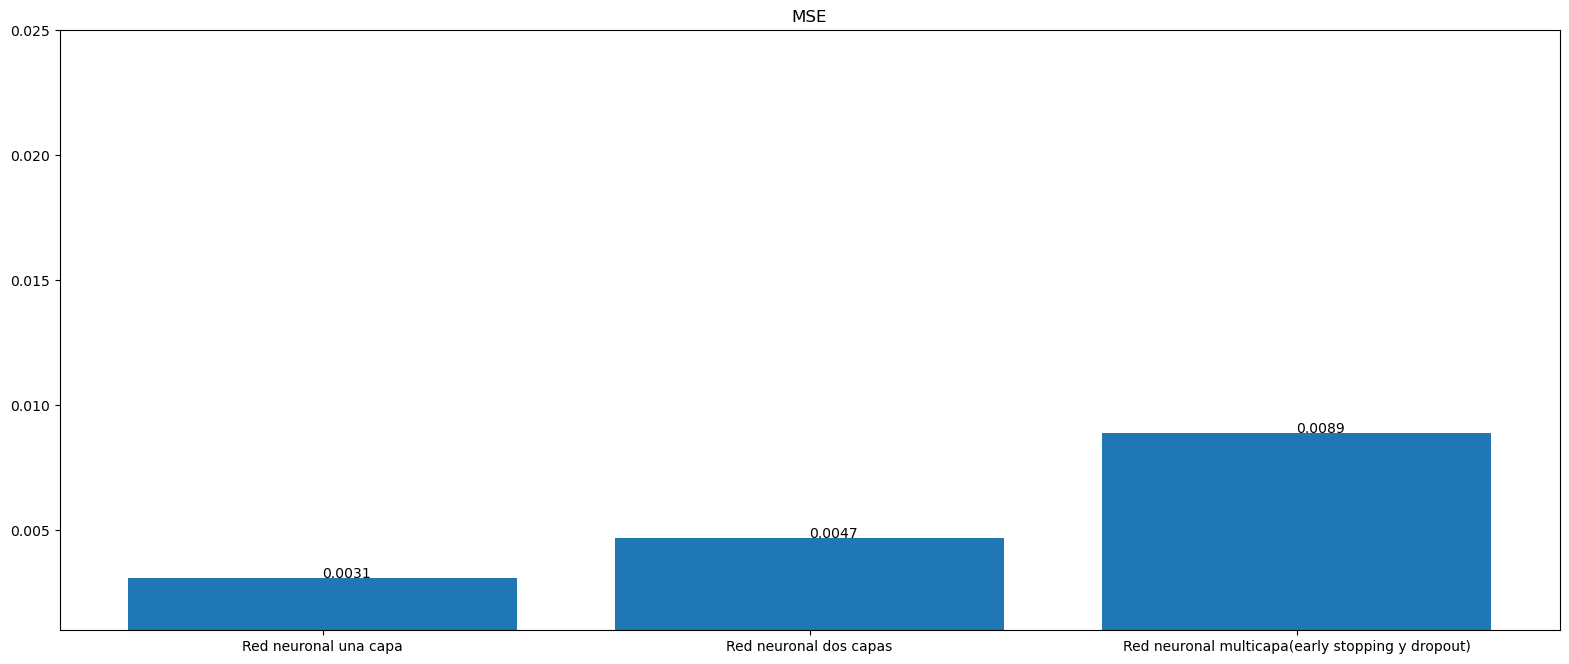

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,6))
ax = fig.add_axes([0,0,1,1])

ax.set_title("MSE")
ejeX = ['Red neuronal una capa','Red neuronal dos capas','Red neuronal multicapa(early stopping y dropout)']
ejeY = [round(MSE_1,4), round(MSE_2,4), round(MSE_3,4) ]
ax.bar(ejeX,ejeY)
plt.ylim(0.001,0.025)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

### Comparación y análisis de resultados

##### Modelo con el mejor desempeño:  
Según las métricas utilizadas el modelo con el mejor desempeño es la Red neuronal de una capa con un MAE = 0.0409 y un MSE = 0.0031  
**Ventajas:** La implementación es sencilla, presenta una complejidad baja, requiere menos tiempo de entrenamiento en comparación con modelos más robustos. El modelo tiene un mejor rendimiento.   
**Desventajas:** Su capacidad es limitada para el aprendizaje complejo de los datos, puede presentarse problemas para analizar datos nuevos.

##### Modelo con el menor desempeño:  
Según las métricas utilizadas el modelo con el menor desempeño es la Red neuronal multicapa con un MAE = 0.0721 y un MSE = 0.0089 
**Desventajas:** Requiere más tiempo de entrenamiento que modelos con menos capas
Con el uso de más técnicas puede reducirse la capacidad del modelo para ajustarse a los datos de entrenamiento.
Existe mayor dificultad en cuanto al equilibrio de incluir más capas y usar más técnicas de regularización
